# Acciones Bancolombia
# 19990 -2020

In [56]:
import pandas as pd
import warnings
import yfinance as yf
import rpy2
warnings.filterwarnings('ignore')

In [57]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [58]:
import plotly.graph_objects as go

def plot_(title, *series):
    # Crear una figura
    fig = go.Figure()

    # Agregar cada serie de datos al gráfico
    for x_variable, y_variable, label in series:
        fig.add_trace(go.Scatter(
            x=x_variable,
            y=y_variable,
            mode='lines',
            name=label,
            line=dict(width=2)
        ))

    # Actualizar el tipo de eje x a 'date'
    fig.update_xaxes(type='date')

    # Ajustar el título para que esté centrado
    fig.update_layout(title_text=title, title_x=0.5)

    # Personalizar el selector de rango de fechas
    fig.update_layout(
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label="1d",
                         step="day",
                         stepmode="backward"),
                    dict(count=7,
                         label="1w",
                         step="day",
                         stepmode="backward"),
                    dict(count=1,
                         label="1m",
                         step="month",
                         stepmode="backward"),
                    dict(count=3,
                         label="3m",
                         step="month",
                         stepmode="backward"),
                    dict(count=6,
                         label="6m",
                         step="month",
                         stepmode="backward"),
                    dict(count=1,
                         label="1y",
                         step="year",
                         stepmode="backward"),
                    dict(count=2,
                         label="2y",
                         step="year",
                         stepmode="backward"),
                    dict(count=3,
                         label="3y",
                         step="year",
                         stepmode="backward"),
                    dict(count=5,
                         label="5y",
                         step="year",
                         stepmode="backward"),
                    dict(count=10,
                         label="10y",
                         step="year",
                         stepmode="backward"),
                    dict(count=15,
                         label="15y",
                         step="year",
                         stepmode="backward"),
                    dict(count=20,
                         label="20y",
                         step="year",
                         stepmode="backward"),
                    dict(count=25,
                         label="25y",
                         step="year",
                         stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        ),
        yaxis=dict(
            autorange=True,
            type="linear"
        )
    )

    # Personalizar los títulos de los ejes
    fig.update_layout(
        xaxis_title="Tiempo",
        yaxis_title="Precio de la acción"
    )

    # Personalizar la leyenda
    fig.update_layout(
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1,
            xanchor="left",
            x=-.35
        )
    )

    # Mostrar el gráfico
    fig.show()


## 0. Importación de Datos

La elección de la base de datos que abarca el periodo 2000-01-01 a 2020-01-01 para analizar las acciones de Bancolombia se justifica por la exclusión del impacto de la pandemia mundial, permitiendo un enfoque claro en factores y tendencias previas a este suceso. La extensión temporal facilita la evaluación del comportamiento de las acciones, buscando determinar si siguen una caminata aleatoria, lo que es esencial para evaluar la eficacia de estrategias de inversión basadas en análisis histórico. Además, la serie temporal presenta irregularidades en la espaciación de los datos, lo que agrega complejidad al análisis y requiere adaptación en las técnicas utilizadas para tener en cuenta la variabilidad en la frecuencia de observaciones.

In [59]:
ticker_name = 'BC'

data = yf.download(ticker_name, start='1990-01-01', end='2020-01-02')
print(data.shape)
data.head()

[*********************100%***********************]  1 of 1 completed
(7559, 6)


Open    High     Low   Close  Adj Close  Volume
Date                                                         
1990-01-02  14.000  14.500  13.875  14.500   7.852427  132400
1990-01-03  14.500  14.625  14.250  14.375   7.784732   96200
1990-01-04  14.250  14.500  14.125  14.375   7.784732  150900
1990-01-05  14.125  14.375  14.000  14.375   7.784732   87300
1990-01-08  14.250  14.375  14.000  14.250   7.717036  106400

In [60]:
df = pd.DataFrame()
df["Date"] = pd.to_datetime(data.index)
df["Close"] = data["Close"].values
display(df.head(10))
df.shape

Date   Close
0 1990-01-02  14.500
1 1990-01-03  14.375
2 1990-01-04  14.375
3 1990-01-05  14.375
4 1990-01-08  14.250
5 1990-01-09  14.000
6 1990-01-10  14.000
7 1990-01-11  14.000
8 1990-01-12  13.625
9 1990-01-15  13.875

(7559, 2)

In [61]:
df_completo = df.copy()
df_completo.set_index('Date', inplace=True)
df_completo = df_completo.resample('1D').mean().ffill()
display(df_completo.head(10))
df_completo.shape

Close
Date              
1990-01-02  14.500
1990-01-03  14.375
1990-01-04  14.375
1990-01-05  14.375
1990-01-06  14.375
1990-01-07  14.375
1990-01-08  14.250
1990-01-09  14.000
1990-01-10  14.000
1990-01-11  14.000

(10956, 1)

In [62]:
%R -i df

In [63]:
%%R
library(tidyverse)
library(fpp3)
library(lubridate)


df=df %>% 
  mutate(Date=ymd(Date)) %>% 
  as_tsibble(index = Date) %>%
  fill_gaps(.full=TRUE) %>%
  fill('Close', .direction = 'down')
head(df, 10)

# A tsibble: 10 x 2 [1D]
   Date       Close
   <date>     <dbl>
 1 1990-01-02  14.5
 2 1990-01-03  14.4
 3 1990-01-04  14.4
 4 1990-01-05  14.4
 5 1990-01-06  14.4
 6 1990-01-07  14.4
 7 1990-01-08  14.2
 8 1990-01-09  14  
 9 1990-01-10  14  
10 1990-01-11  14  


In [64]:
plot_('Acciones Bancolombia', (df["Date"], df["Close"], "Close"))

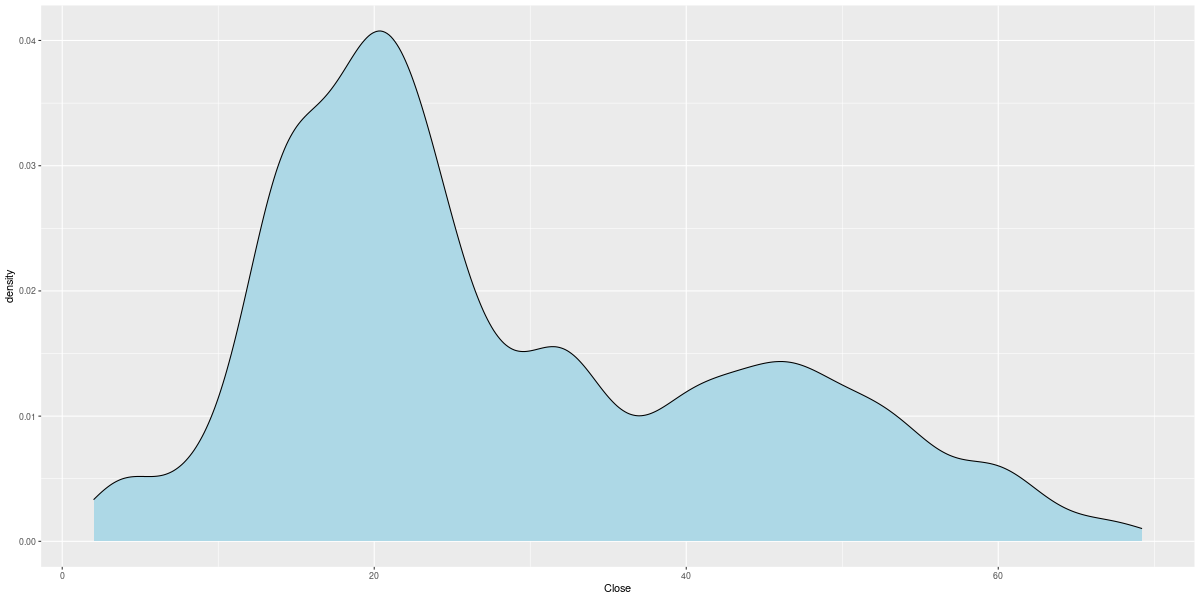

In [65]:
%%R -w 1200 -h 600
library(patchwork)
ggplot(df,aes(x=Close))+
  geom_density(fill="lightblue")

# 1. Estabilizar varianza.

En esta sección se buscará una herramienta para estabilizar la varianza, siempre y cuando pareciera que no se encuentre estabilizada.

#### Familia de transformaciones Box-Cox:

En ocasiones la serie presenta varianza marginal no constante a lo largo del tiempo, lo cual hace necesario tener en cuenta tal característica. En este caso, se siguiere hacer una transformación de potencia para estabilizar la varianza. Esta familia de transformaciones se llaman transformaciones Box-Cox.

$$
    f_{\lambda}(u_{t})= \begin{cases}
        \lambda^{-1}(u^{\lambda}_{t}-1), &  \text{si  $u_{t} \geq 0$, para $\lambda>0$,}\\
        \ln(u_{t}), &\text{ si $u_{t}>0$, para $\lambda=0$}.
    \end{cases}
$$

note que la familia de funciones dependen del $\lambda$ escogido, pero como se escoge $\lambda$?. La respuesta es usando librerías de $R$ o Python.

**Nota**: Si el lambda calculado es muy cercano a 1, se recomienda no hacer Box-cox

## 1.1. Estimación de $\lambda$

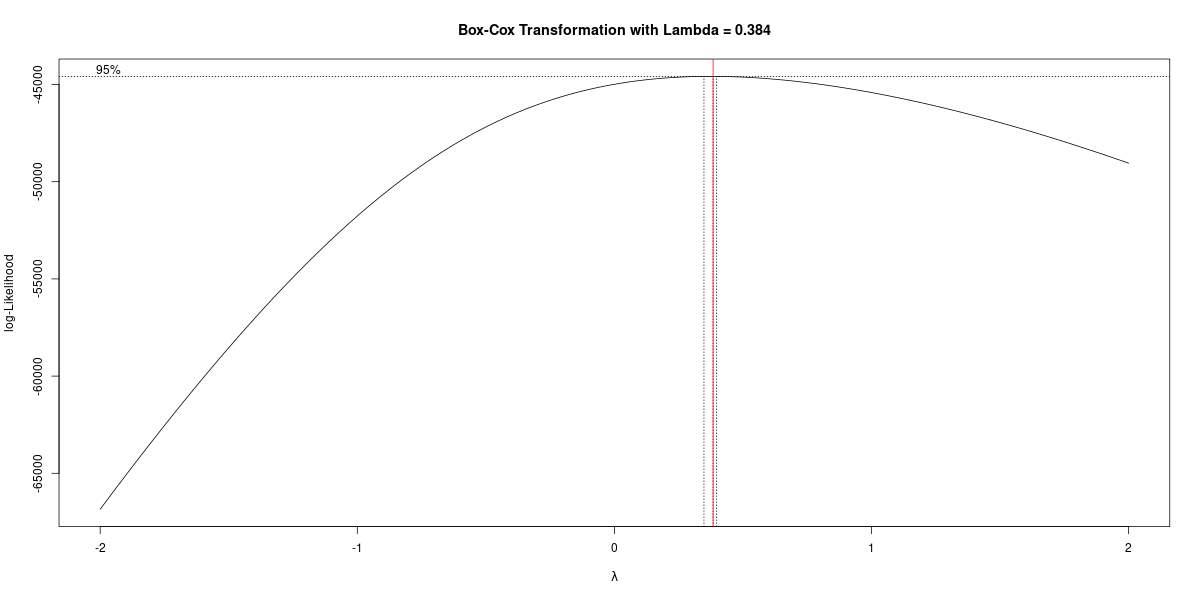

In [66]:
%%R -w 1200 -h 600

library(forecast)
library(MASS)

b <- boxcox(df$Close ~ 1)
lambda <- b$x[which.max(b$y)]

title(main = paste("Box-Cox Transformation with Lambda =", round(lambda, 3) ))
abline(v = lambda, col = "red")

## 1.2. Grafico Box-Cox

In [67]:
from scipy.stats import boxcox

df_completo['BoxCox_Close'], lambda_value = boxcox(df_completo['Close']) 
print(lambda_value)
plot_(f'Estabilización de la Varianza (Box-cox λ ={lambda_value:.3f} )', (df_completo.index, df_completo["Close"], "Datos Originales"),
      (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"))

0.3740590375907288


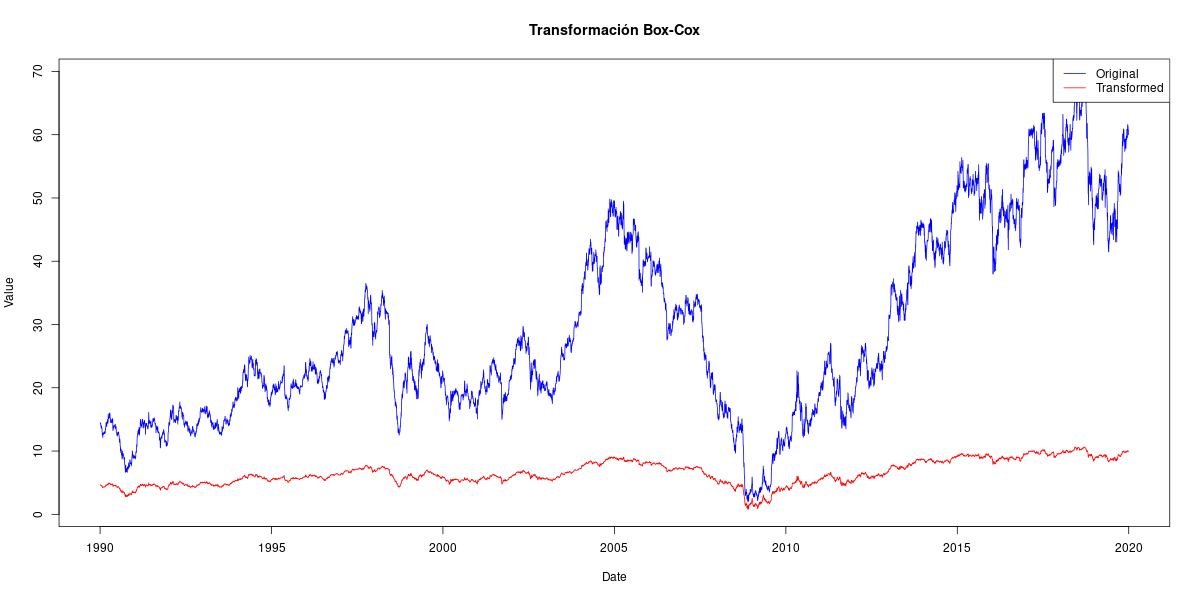

In [68]:
%%R -w 1200 -h 600

transformed_data <- forecast::BoxCox(df$Close, lambda = lambda)
plot(df$Date, df$Close, type = "l", col = "blue", ylim = range(c(df$Close, transformed_data)), 
     xlab = "Date", ylab = "Value", main = paste("Transformación Box-Cox"))
lines(df$Date, transformed_data, col = "red")
legend("topright", legend = c("Original", "Transformed"), col = c("blue", "red"), lty = 1)

# 2. Estimación de la tendencia

## 2.1 Loess

In [69]:
from statsmodels.nonparametric.smoothers_lowess import lowess


frac = 0.05  
smoothed_values = lowess(df_completo['BoxCox_Close'], df_completo.index, frac=frac, it=0)
trend_removed = df_completo['BoxCox_Close'] - smoothed_values[:, 1]

plot_('Eliminación de Tendencia por Lowees', (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"),
      (df_completo.index, smoothed_values[:, 1], "Suavizado"),
      (df_completo.index, trend_removed, "Tendencia Removida"))
      

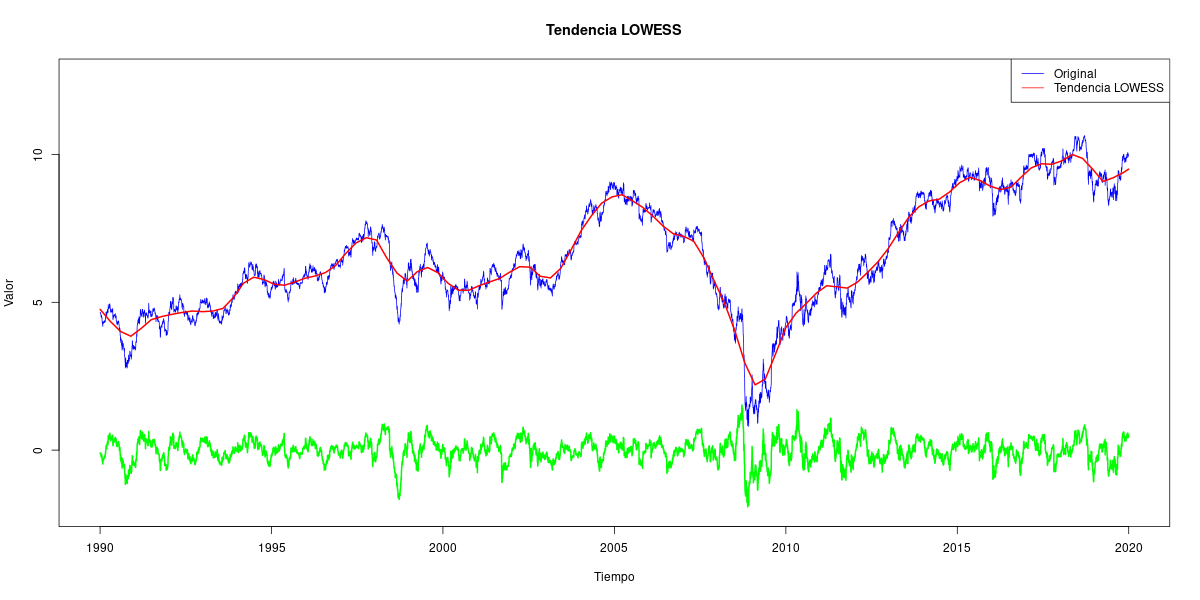

In [70]:
%%R -w 1200 -h 600

# Supongamos que tienes un dataframe df con una columna llamada 'Index'

# Calcular LOWESS
trend_lowess_R <- lowess(transformed_data,  f = 0.05, iter = 0)
trend_removed <- transformed_data - trend_lowess_R$y

# Crear un gráfico de la serie original y la tendencia LOWESS
plot(df$Date, transformed_data, type='l', col='blue', xlab='Tiempo', ylab='Valor', 
     main='Tendencia LOWESS', ylim=c(-2, max(transformed_data)+2))
lines(df$Date, trend_lowess_R$y, col='red', lwd=2)
lines(df$Date, trend_removed, col='green', lwd=2)
legend('topright', legend=c('Original', 'Tendencia LOWESS'), col=c('blue', 'red'), lty=1)


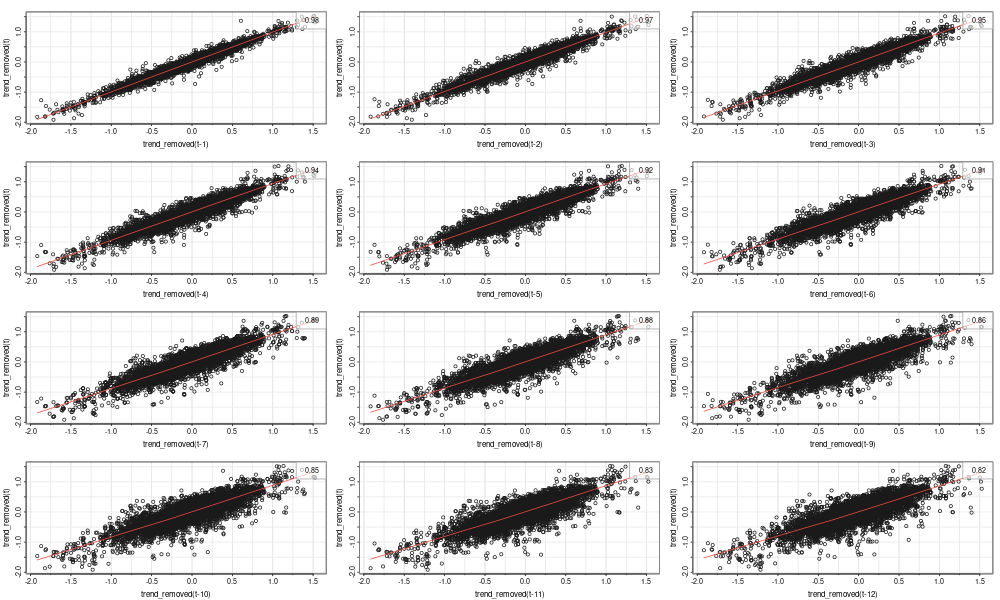

In [71]:
%%R -w 1000 -h 600
options(repr.plot.width=20, repr.plot.height=6)
library(astsa)
astsa::lag1.plot(trend_removed, 12)

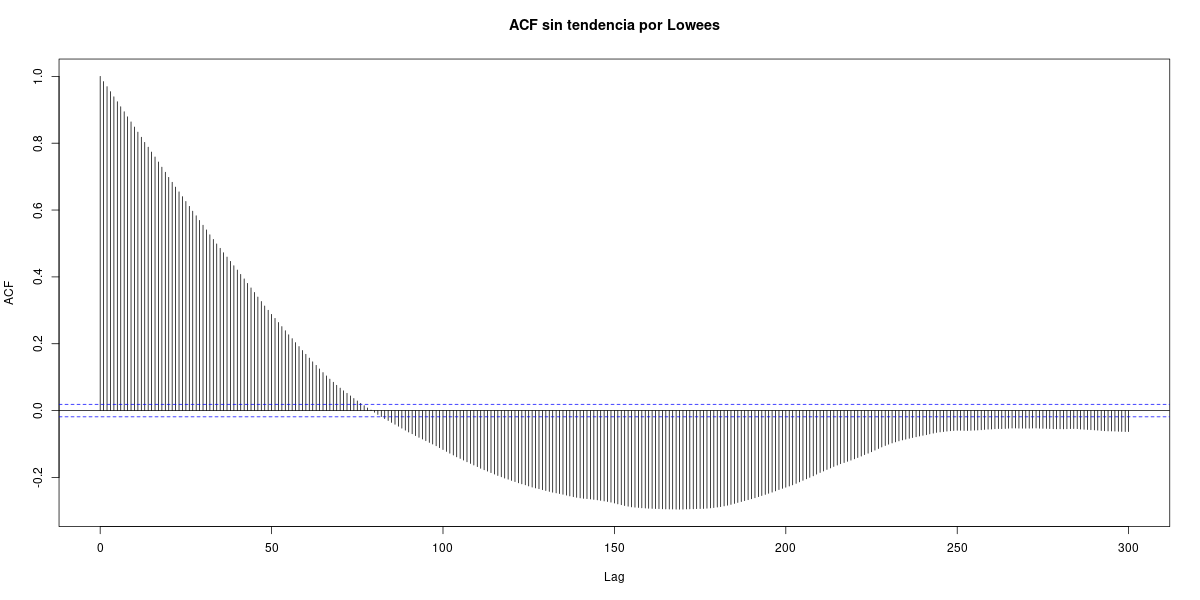

In [72]:
%%R -w 1200 -h 600

acf(trend_removed, lag.max = 300, main = "ACF sin tendencia por Lowees")

$time.lag
 [1]  0  1  2  3  4  5  6  7  8  9 10 11

 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50

$mutual.information
 [1] 2.3035167 1.5328121 1.2857004 1.1227285 1.0074259 0.9206738 0.8486195
 [8] 0.7875747 0.7383720 0.6907760 0.6482967 0.6126775 0.5782342 0.5494732
[15] 0.5241840 0.4991412 0.4722189 0.4490328 0.4261041 0.4058191 0.3886526
[22] 0.3707483 0.3548489 0.3367643 0.3230312 0.3088482 0.2954450 0.2817501
[29] 0.2732767 0.2596427 0.2452111 0.2364459 0.2282797 0.2209598 0.2139503
[36] 0.2082974 0.1967614 0.1873349 0.1778140 0.1725004 0.1666897 0.1642072
[43] 0.1589315 0.1518259 0.1453458 0.1402644 0.1339017 0.1275473 0.1248554
[50] 0.1221168 0.1163597

$units
[1] "Nats"

$n.partitions
[1] 22

attr(,"class")
[1] "mutualInf"


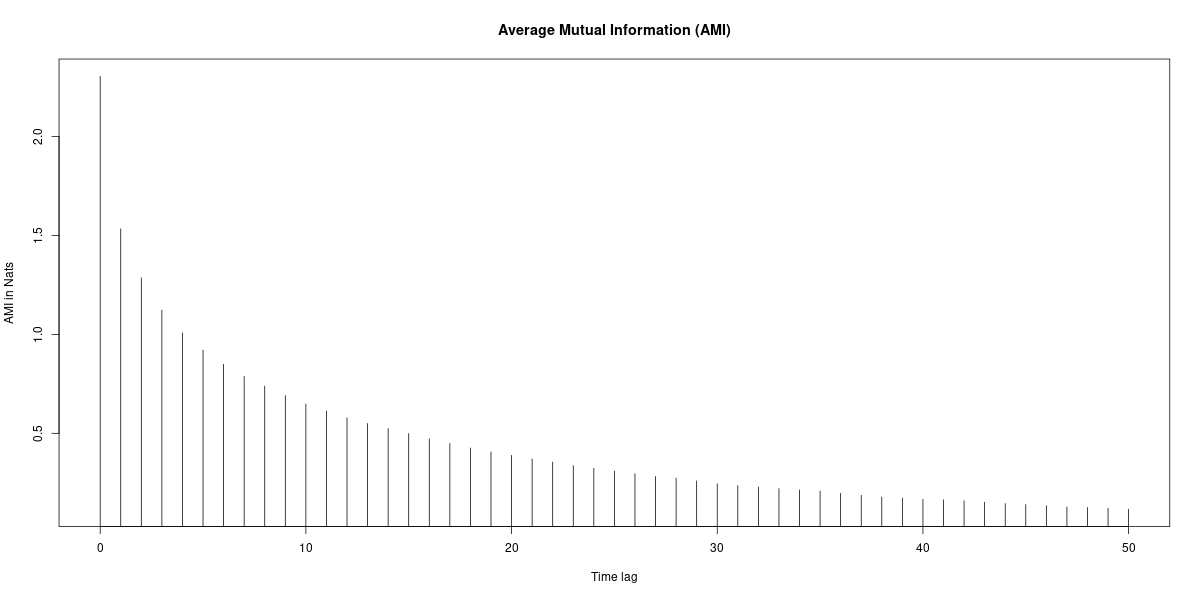

In [73]:
%%R -w 1200 -h 600
nonlinearTseries::mutualInformation(trend_removed,lag.max = 50, main="Información mutua")

## 2.2 Diferencia ordinaria



Apliquemos una diferencia ordinaria de orden 1 a la serie

$$
\nabla^1 Y_t=(1-B)^1 Y_t=Y_t-Y_{t-1}
$$

In [74]:
Close_diff = df_completo['BoxCox_Close'].diff()

plot_('Diferenciación de la Serie Temporal', (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"),
      (df_completo.index, Close_diff, "Diferencia Ordinaria"))

In [75]:
%R -i Close_diff

In [76]:
%%R

Close_diff <- na.omit(Close_diff)

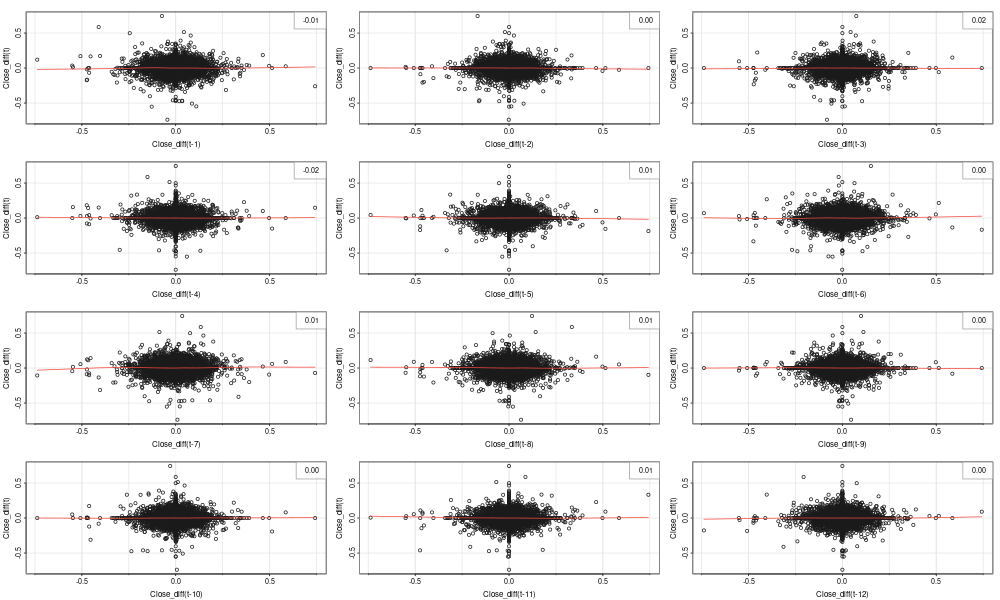

In [77]:
%%R -w 1000 -h 600
options(repr.plot.width=20, repr.plot.height=6)
library(astsa)
astsa::lag1.plot(Close_diff, 12)

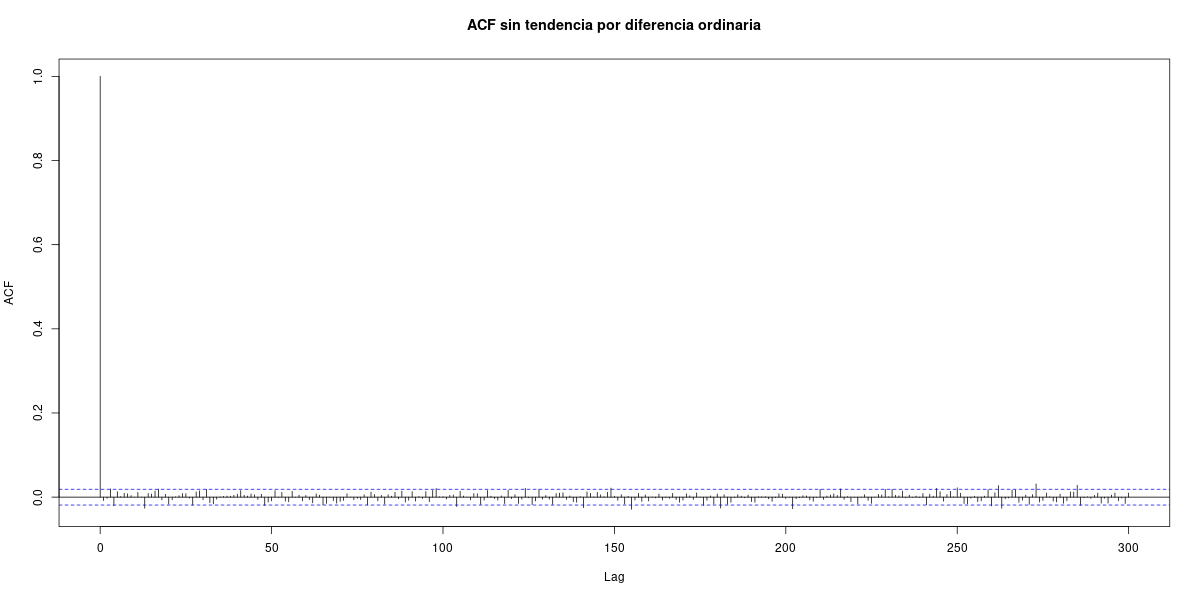

In [78]:
%%R -w 1200 -h 600

acf(Close_diff, lag.max = 300, main = "ACF sin tendencia por diferencia ordinaria")

$time.lag
 [1]  0  1  2  3  4  5

  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50

$mutual.information
 [1] 1.29684892 0.01971828 0.01500204 0.01880278 0.01994565 0.01490724
 [7] 0.01905847 0.07237384 0.01635243 0.01431585 0.01805374 0.01854070
[13] 0.01366651 0.01913972 0.06586459 0.02037869 0.01318819 0.01794999
[19] 0.01679291 0.01390995 0.01881510 0.06252770 0.01637833 0.01192323
[25] 0.01864528 0.01898719 0.01329318 0.01618505 0.06452700 0.01721561
[31] 0.01474593 0.01689027 0.01923126 0.01627783 0.01636242 0.06864417
[37] 0.01671826 0.01327779 0.01764151 0.01791075 0.01428303 0.01752181
[43] 0.06393728 0.01863364 0.01367467 0.01593474 0.01699522 0.01316978
[49] 0.01474457 0.06464829 0.01771386

$units
[1] "Nats"

$n.partitions
[1] 22

attr(,"class")
[1] "mutualInf"


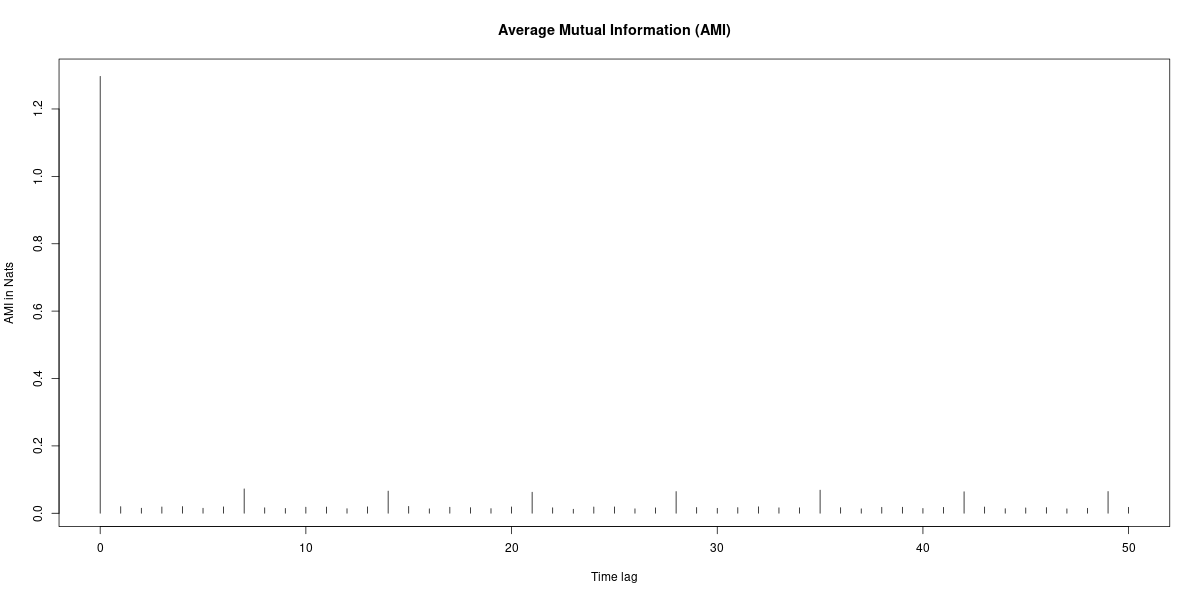

In [79]:
%%R -w 1200 -h 600
nonlinearTseries::mutualInformation(Close_diff,lag.max = 50, main="Información mutua de la diferencia ordinaria")

# 3. Estacionalidad

In [80]:
df_completo['Trend_Removed'] = trend_removed
df_completo.reset_index(inplace=True)
df_completo['Day_Name'] = df_completo['Date'].dt.day_name()
df_completo

Date      Close  BoxCox_Close  Trend_Removed   Day_Name
0     1990-01-02  14.500000      4.595715      -0.092516    Tuesday
1     1990-01-03  14.375000      4.572211      -0.112269  Wednesday
2     1990-01-04  14.375000      4.572211      -0.108518   Thursday
3     1990-01-05  14.375000      4.572211      -0.104767     Friday
4     1990-01-06  14.375000      4.572211      -0.101017   Saturday
...          ...        ...           ...            ...        ...
10951 2019-12-27  60.779999      9.751489       0.482532     Friday
10952 2019-12-28  60.779999      9.751489       0.480322   Saturday
10953 2019-12-29  60.779999      9.751489       0.478106     Sunday
10954 2019-12-30  60.110001      9.700079       0.424473     Monday
10955 2019-12-31  59.980000      9.690063       0.412227    Tuesday

[10956 rows x 5 columns]

In [81]:
import plotly.express as px


# Crear el box plot utilizando plotly.express
fig = px.box(df_completo, x='Day_Name', y='Trend_Removed', title='Box Plot de trend_removed por Día de la Semana', labels={'Trend_Removed': 'Trend Removed'})
fig.update_layout(title_text='Box Plot por Día de la Semana', title_x=0.5)
fig.show()

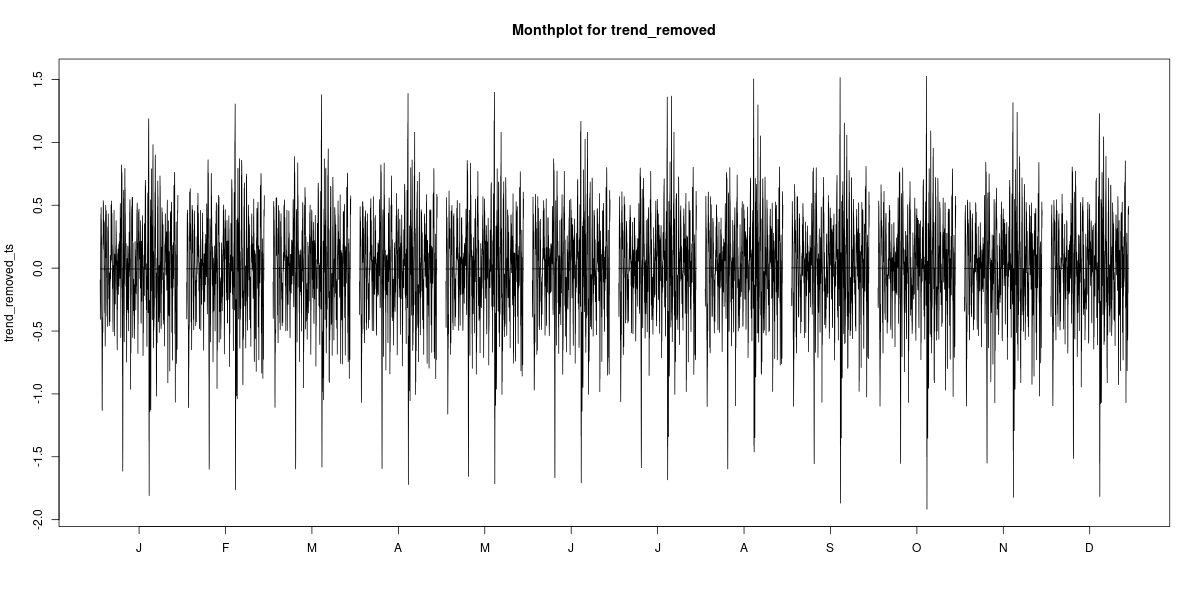

In [82]:
%%R -w 1200 -h 600
# Convert the Date column to Date class if it is not already

trend_removed_ts <- ts(trend_removed, start = start(df$Date), frequency = 12)
monthplot(trend_removed_ts, main = 'Monthplot for trend_removed')

In [84]:
# Extraer el mes de la fecha
df_completo['Month'] = df_completo['Date'].dt.month_name()

# Crear el box plot utilizando plotly.express
fig = px.box(df_completo, x='Month', y='Trend_Removed', title='Box Plot de trend_removed por Mes', labels={'Trend_Removed': 'Trend Removed'})
fig.update_layout(title_text='Box Plot por Mes', title_x=0.5)
fig.show()


In [85]:
# Extraer el año de la fecha
df_completo['Year'] = df_completo['Date'].dt.year

# Crear el box plot utilizando plotly.express
fig = px.box(df_completo, x='Year', y='Trend_Removed', title='Box Plot de trend_removed por Año', labels={'Trend_Removed': 'Trend Removed'})
fig.update_layout(title_text='Box Plot por Año', title_x=0.5)
fig.show()

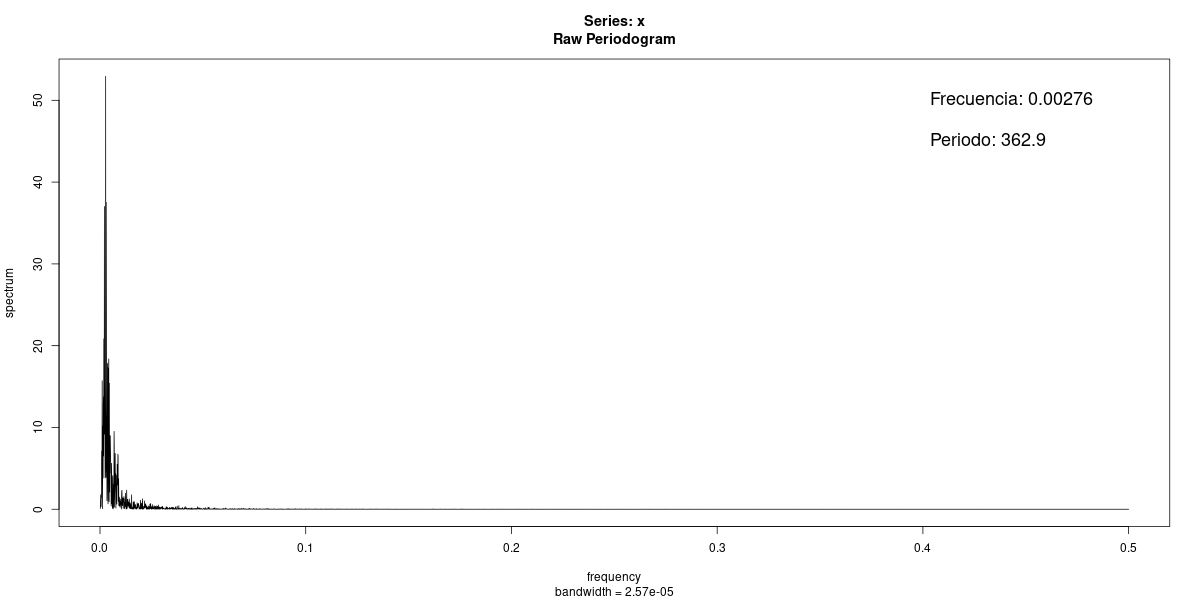

In [86]:
%%R -w 1200 -h 600

# Calculate the periodogram for data2
Periogram <- spectrum(as.numeric(trend_removed_ts), log = 'no')

# Get the index where the periodogram maximizes
ubicacion <- which.max(Periogram$spec)

# Get the frequency value at the index where the periodogram maximizes
max_freq <- Periogram$freq[ubicacion]

# Calculate the corresponding period
max_period <- 1 / max_freq

# Plot the periodogram for data2

# Add text annotation for frequency and period
text(.4, 50, sprintf("Frecuencia: %s", round(max_freq, 5)), pos = 4, cex = 1.5)
text(.4, 45, sprintf("Periodo: %s", round(max_period, 2)), pos = 4, cex = 1.5)

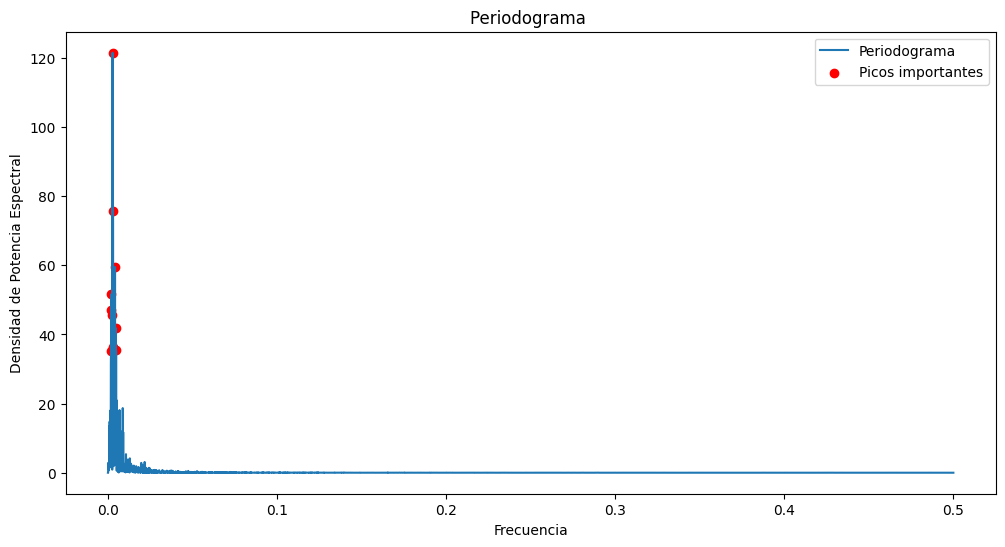

Los 10 Picos mas grandes para el periodograma son:


0           1           2  \
Frecuencia                        0.002738    0.003012    0.004199   
Periodo                         365.200000  332.000000  238.173913   
Densidad de Potencia Espectral  121.532504   75.689058   59.519731   

                                         3           4           5  \
Frecuencia                        0.001917    0.002099    0.002191   
Periodo                         521.714286  476.347826  456.500000   
Densidad de Potencia Espectral   51.599705   47.008857   45.692978   

                                         6           7           8           9  
Frecuencia                        0.004564    0.003103    0.004838    0.001825  
Periodo                         219.120000  322.235294  206.716981  547.800000  
Densidad de Potencia Espectral   41.848536   36.415162   35.376937   35.111360

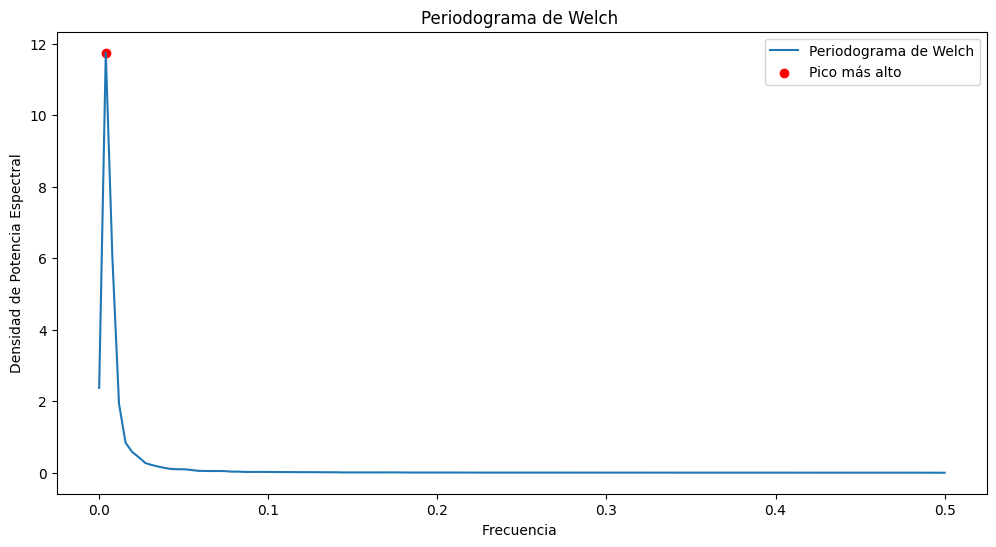

El pico más notorio se da: 
 - Frecuencia: 0.00390625  
                                    
 - Periodo: 256.0 
                                    
 - Densidad de Potencia Espectral: 11.742987235099994


In [94]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import heapq


# Calcular el periodograma
f, Pxx_den = signal.periodogram(trend_removed)

# Encontrar los picos más importantes
peaks_indices = heapq.nlargest(10, range(len(Pxx_den)), key=Pxx_den.__getitem__)
f_freq = f[peaks_indices]
densidad = Pxx_den[peaks_indices]
f_period = 1 / f[peaks_indices]

# Calcular el periodograma de Welch
f_welch, Pxx_den_welch = signal.welch(trend_removed)

# Encontrar el pico más alto del periodograma de Welch
max_index_value_welch = np.argmax(Pxx_den_welch)
frecuencia_max_welch = f_welch[max_index_value_welch]
frecuencia_pico_welch = 1 / frecuencia_max_welch




# Graficar el periodograma
plt.figure(figsize=(12, 6))
plt.plot(f, Pxx_den, label='Periodograma')
plt.scatter(f[peaks_indices], Pxx_den[peaks_indices], color='red', label='Picos importantes')

plt.xlabel('Frecuencia')
plt.ylabel('Densidad de Potencia Espectral')
plt.title('Periodograma ')
plt.legend()
plt.show()

print('Los 10 Picos mas grandes para el periodograma son:')

# Crear DataFrame con las frecuencias y los periodos
data = {'Frecuencia': f_freq, 'Periodo': f_period, 'Densidad de Potencia Espectral': densidad}
df_frecuencias_periodos = pd.DataFrame(data).sort_values(by='Densidad de Potencia Espectral', ascending=False)

# Mostrar el DataFrame
display(df_frecuencias_periodos.T)

# Graficar el periodograma de Welch
plt.figure(figsize=(12, 6))
plt.plot(f_welch, Pxx_den_welch, label='Periodograma de Welch')
plt.scatter(frecuencia_max_welch, Pxx_den_welch[max_index_value_welch], color='red', label='Pico más alto')

plt.xlabel('Frecuencia ')
plt.ylabel('Densidad de Potencia Espectral')
plt.title('Periodograma de Welch ')
plt.legend()
plt.show()

print(f"""El pico más notorio se da: \n - Frecuencia: {frecuencia_max_welch}  
                                    \n - Periodo: {frecuencia_pico_welch} 
                                    \n - Densidad de Potencia Espectral: {Pxx_den_welch[max_index_value_welch]}""")

# 4. Modelado

## 4.1 Definición Train y Test

In [95]:
import tensorflow as tf
from datetime import timedelta
import tensorflow.keras as keras

2024-06-09 20:13:44.604813: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-09 20:13:47.726521: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [105]:
train_weight = 0.8
split = int(len(df_completo) * train_weight)
df_seg = df_completo[['Date', 'Close']].copy()

df_seg.index = pd.to_datetime(df_seg['Date'])
df_seg.drop(columns=['Date'], inplace=True)
df_train = df_seg['Close'].iloc[:split]
df_test = df_seg['Close'].iloc[split:]

display(df_seg.head())
display(df_train.tail())
display(df_test.head())


Close
Date              
1990-01-02  14.500
1990-01-03  14.375
1990-01-04  14.375
1990-01-05  14.375
1990-01-06  14.375

Date
2013-12-26    45.700001
2013-12-27    45.709999
2013-12-28    45.709999
2013-12-29    45.709999
2013-12-30    45.310001
Name: Close, dtype: float64

Date
2013-12-31    46.060001
2014-01-01    46.060001
2014-01-02    45.310001
2014-01-03    45.279999
2014-01-04    45.279999
Name: Close, dtype: float64

In [104]:
plot_('Datos de entrenamiento y prueba', (df_train.index, df_train, 'Entrenamiento'), 
      (df_test.index, df_test, 'Prueba'))

In [99]:
# Escalamiento

mu = float(df_train.mean())
sigma = float(df_train.std())

stdize_input = lambda x: (x - mu) / sigma

df_train = df_train.apply(stdize_input)
df_test = df_test.apply(stdize_input)

In [100]:
def get_lagged_features(df, n_steps, n_steps_ahead):
    """
    df: pandas DataFrame of time series to be lagged
    n_steps: number of lags, i.e., sequence length
    n_steps_ahead: forecasting horizon
    """
    lag_list = []
    
    # Generate lagged features
    for lag in range(n_steps + n_steps_ahead - 1, n_steps_ahead - 1, -1):
        lag_list.append(df.shift(lag))
    
    # Stack lagged features along the third dimension
    lag_array = np.stack([i.values for i in lag_list], axis=-1)
    
    # Drop NaN values resulting from shifting
    lag_array = lag_array[n_steps + n_steps_ahead - 1:]
    
    # Reshape lag_array to add the last dimension
    lag_array = np.expand_dims(lag_array, axis=-1)
    
    return lag_array

In [101]:
n_steps = 12
n_steps_ahead = 1

x_train = get_lagged_features(df_train, n_steps, n_steps_ahead)
y_train =  df_train.values[n_steps + n_steps_ahead - 1:]
y_train_timestamps = df_train.index[n_steps + n_steps_ahead - 1:]

x_test = get_lagged_features(df_test, n_steps, n_steps_ahead)
y_test =  df_test.values[n_steps + n_steps_ahead - 1:]
y_test_timestamps = df_test.index[n_steps + n_steps_ahead - 1:]


print([tensor.shape for tensor in (x_train, y_train, x_test, y_test)])

[(8752, 1, 12, 1), (8752, 1), (2180, 1, 12, 1), (2180, 1)]


In [ ]:
%R -i df_train -i df_test

## 4.2. Modelos ETS

In [ ]:
%%R

library(forecast)
library(ggplot2)
library(xts)
library(quantmod)
library(TTR)
library(zoo)

train_xts <- xts(train$Value, order.by = train$Date)
test_xts <- xts(test$Value, order.by = test$Date)


R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: ‘zoo’


R[write to console]: The following object is masked from ‘package:tsibble’:

    index


R[write to console]: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


R[write to console]: 
######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() func


Error in xts(train$Value, order.by = train$Date) : 
  objeto 'train' no encontrado


Custom TB Handler failed, unregistering


---------------------------------------------------------------------------
RRuntimeError                             Traceback (most recent call last)
File /usr/lib/python3/dist-packages/rpy2/ipython/rmagic.py:268, in RMagics.eval(self, code)
    266 try:
    267     # Need the newline in case the last line in code is a comment.
--> 268     value, visible = ro.r("withVisible({%s\n})" % code)
    269 except (ri.embedded.RRuntimeError, ValueError) as exception:
    270     # Otherwise next return seems to have copy of error.

File /usr/lib/python3/dist-packages/rpy2/robjects/__init__.py:438, in R.__call__(self, string)
    437 p = rinterface.parse(string)
--> 438 res = self.eval(p)
    439 return conversion.rpy2py(res)

File /usr/lib/python3/dist-packages/rpy2/robjects/functions.py:198, in SignatureTranslatedFunction.__call__(self, *args, **kwargs)
    197         kwargs[r_k] = v
--> 198 return (super(SignatureTranslatedFunction, self)
    199         .__call__(*args, **kwargs))

File /

In [ ]:
%%R -w 1200 -h 600
# Load required packages

# Fit an ETS model to the time series
# Fit ETS additive model
model_ets_additive <- ets(df_train, model = "AAA")
model_ets_additive_D <- ets(df_train, model = "AAA", damped = TRUE)

# Fit ETS multiplicative model
model_ets_multiplicative <- ets(df_train, model = "MAM")
model_ets_multiplicative_d <- ets(df_train, model = "MAM", damped = TRUE)


#fitted
fitted_AAA <- fitted(model_ets_additive)
fitted_AAdA <- fitted(model_ets_additive_D)
fitted_MAM <- fitted(model_ets_multiplicative)
fitted_MAdM <- fitted(model_ets_multiplicative_d)

# Plot the time series
autoplot(df_train) +
  autolayer(fitted(model_ets_additive), series = "ETS Additive") +
  autolayer(fitted(model_ets_multiplicative), series = "ETS Multiplicative") +
  autolayer(fitted(model_ets_additive_D), series = "ETS Additive Damped") +
  autolayer(fitted(model_ets_multiplicative_d), series = "ETS Multiplicative Damped") +
  xlab("Date") +
  ylab("Value") +
  ggtitle("Time Series with Fitted ETS Models") +
  theme_minimal()

R[write to console]: Error in ets(df_train, model = "AAA") : Nonseasonal data




Error in ets(df_train, model = "AAA") : Nonseasonal data


RInterpreterError: Failed to parse and evaluate line '# Load required packages\nlibrary(forecast)\nlibrary(ggplot2)\n\n# Fit an ETS model to the time series\n# Fit ETS additive model\nmodel_ets_additive <- ets(df_train, model = "AAA")\nmodel_ets_additive_D <- ets(df_train, model = "AAA", damped = TRUE)\n\n# Fit ETS multiplicative model\nmodel_ets_multiplicative <- ets(df_train, model = "MAM")\nmodel_ets_multiplicative_d <- ets(df_train, model = "MAM", damped = TRUE)\n\n\n#fitted\nfitted_AAA <- fitted(model_ets_additive)\nfitted_AAdA <- fitted(model_ets_additive_D)\nfitted_MAM <- fitted(model_ets_multiplicative)\nfitted_MAdM <- fitted(model_ets_multiplicative_d)\n\n# Plot the time series\nautoplot(df_train) +\n  autolayer(fitted(model_ets_additive), series = "ETS Additive") +\n  autolayer(fitted(model_ets_multiplicative), series = "ETS Multiplicative") +\n  autolayer(fitted(model_ets_additive_D), series = "ETS Additive Damped") +\n  autolayer(fitted(model_ets_multiplicative_d), series = "ETS Multiplicative Damped") +\n  xlab("Date") +\n  ylab("Value") +\n  ggtitle("Time Series with Fitted ETS Models") +\n  theme_minimal()\n'.
R error message: 'Error in ets(df_train, model = "AAA") : Nonseasonal data'

# 